In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [75]:
# Load CSV files into DataFrames
patients = pd.read_csv('patients.csv')
admissions = pd.read_csv('admissions.csv')
diagnoses_icd = pd.read_csv('diagnoses_icd.csv')

# Patients

In [76]:
# Patients: subject_id (primary key), anchor_age (age at anchor_year), anchor_year_group (range around real anchor_year)
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [77]:
# Calculate birth year (de-identified) to help with calculating age at admission
patients["birth_year"] = patients["anchor_year"] - patients["anchor_age"]
patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,birth_year
0,10000032,F,52,2180,2014 - 2016,2180-09-09,2128
1,10000048,F,23,2126,2008 - 2010,NaN,2103
2,10000058,F,33,2168,2020 - 2022,NaN,2135
3,10000068,F,19,2160,2008 - 2010,NaN,2141
4,10000084,M,72,2160,2017 - 2019,2161-02-13,2088


In [78]:
pat_df = patients[["subject_id", "gender", "anchor_age", "anchor_year", "anchor_year_group", "birth_year"]]

# Admissions

In [79]:
# Admissions: subject_id (links to patients, duplicates), hadm_id (primary key)
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P13JMH,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
546024,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P38XL8,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
546025,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P33612,EMERGENCY ROOM,DIED,Private,English,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
546026,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P036NA,EMERGENCY ROOM,HOME,Private,English,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [26]:
admissions.nunique()

subject_id              223452
hadm_id                 546028
admittime               534919
dischtime               528871
deathtime                11788
admission_type               9
admit_provider_id         2045
admission_location          11
discharge_location          13
insurance                    5
language                    25
marital_status               4
race                        33
edregtime               372692
edouttime               372755
hospital_expire_flag         2
length_of_stay           39931
dtype: int64

In [80]:
# Set timestamp columns type
admissions[['admittime', 'dischtime']] = admissions[['admittime', 'dischtime']].apply(pd.to_datetime)

In [81]:
# Check if any subject has different values for race
patient_race = admissions.groupby('subject_id')['race'].nunique()
multiple = patient_race[patient_race > 1]
multiple

subject_id
10002013    2
10002869    2
10003502    2
10003731    2
10004457    2
           ..
19994379    2
19994592    3
19995320    2
19997911    2
19999287    2
Name: race, Length: 11900, dtype: int64

In [82]:
admissions[admissions['subject_id'] == 19999287][['subject_id', 'hadm_id', 'race']]

,subject_id,hadm_id,race
545976,19999287,20175828,BLACK/AFRICAN AMERICAN
545977,19999287,22997012,BLACK/AFRICAN AMERICAN
545978,19999287,25875727,WHITE


In [83]:
# Set race to UNKNOWN if multiple
admissions.loc[admissions['subject_id'].isin(multiple.index), 'race'] = "UNKNOWN"
admissions["race"].nunique()

33

In [85]:
# Calculate length of stay for each admission
admissions["length_of_stay"] = admissions['dischtime'] - admissions["admittime"]
admissions.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,length_of_stay
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,0 days 18:52:00
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1 days 00:22:00
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,1 days 18:06:00
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2 days 05:20:00
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,0 days 07:10:00


In [86]:
# Merge patients and admissions
pat_adm_df = pd.merge(pat_df, admissions[["subject_id", "race", "hadm_id", "admittime", "dischtime", "length_of_stay"]], on='subject_id', how='inner')
pat_adm_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,race,hadm_id,admittime,dischtime,length_of_stay
0,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00
1,10000032,F,52,2180,2014 - 2016,2128,WHITE,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00
2,10000032,F,52,2180,2014 - 2016,2128,WHITE,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00
3,10000032,F,52,2180,2014 - 2016,2128,WHITE,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00
4,10000068,F,19,2160,2008 - 2010,2141,WHITE,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,0 days 07:10:00
...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,F,46,2147,2017 - 2019,2101,WHITE,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00
546024,19999828,F,46,2147,2017 - 2019,2101,WHITE,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,17 days 01:47:00
546025,19999840,M,58,2164,2008 - 2010,2106,WHITE,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00
546026,19999840,M,58,2164,2008 - 2010,2106,WHITE,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00


In [87]:
# Calculate age at admission, age at discharge
pat_adm_df['admit_age'] = pat_adm_df['admittime'].dt.year - pat_adm_df['birth_year']
pat_adm_df['disch_age'] = pat_adm_df['dischtime'].dt.year - pat_adm_df['birth_year']
pat_adm_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,race,hadm_id,admittime,dischtime,length_of_stay,admit_age,disch_age
0,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52
1,10000032,F,52,2180,2014 - 2016,2128,WHITE,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,52,52
2,10000032,F,52,2180,2014 - 2016,2128,WHITE,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,52,52
3,10000032,F,52,2180,2014 - 2016,2128,WHITE,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,52,52
4,10000068,F,19,2160,2008 - 2010,2141,WHITE,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,0 days 07:10:00,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,F,46,2147,2017 - 2019,2101,WHITE,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,48,48
546024,19999828,F,46,2147,2017 - 2019,2101,WHITE,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,17 days 01:47:00,46,46
546025,19999840,M,58,2164,2008 - 2010,2106,WHITE,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,58,58
546026,19999840,M,58,2164,2008 - 2010,2106,WHITE,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,58,58


In [88]:
(pat_adm_df["dischtime"] - pat_adm_df["admittime"]).describe()

count                       546028
mean     4 days 18:16:54.480283062
std      7 days 04:58:15.641908180
min              -1 days +01:19:00
25%                1 days 03:05:00
50%                2 days 19:38:00
75%                5 days 14:55:00
max              515 days 13:30:00
dtype: object

In [89]:
pat_adm_df.nunique()

subject_id           223452
gender                    2
anchor_age               73
anchor_year              99
anchor_year_group         5
birth_year              163
race                     33
hadm_id              546028
admittime            534919
dischtime            528871
length_of_stay        39931
admit_age                88
disch_age                88
dtype: int64

# Diagnoses

In [90]:
# Diagnoses: subject_id (links to patients), hadm_id (links to admissions), seq_num (rank of diagnosis for an admission -- potentially multiple per admission), icd_code+icd_version (link to diagnoses_icd_d)
diagnoses_icd

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
6364515,19999987,23865745,7,41401,9
6364516,19999987,23865745,8,78039,9
6364517,19999987,23865745,9,0413,9
6364518,19999987,23865745,10,36846,9


In [91]:
diagnoses_icd.nunique()

subject_id     223293
hadm_id        545499
seq_num            39
icd_code        28562
icd_version         2
dtype: int64

# Merge and Sort

In [92]:
# Merge pat_adm_df with diagnoses
merged_df = pd.merge(pat_adm_df, diagnoses_icd, on=['subject_id', 'hadm_id'], how='inner')
merged_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,race,hadm_id,admittime,dischtime,length_of_stay,admit_age,disch_age,seq_num,icd_code,icd_version
0,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,1,5723,9
1,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,2,78959,9
2,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,3,5715,9
3,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,4,07070,9
4,10000032,F,52,2180,2014 - 2016,2128,WHITE,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,5,496,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364483,19999987,F,57,2145,2011 - 2013,2088,UNKNOWN,23865745,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,7,41401,9
6364484,19999987,F,57,2145,2011 - 2013,2088,UNKNOWN,23865745,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,8,78039,9
6364485,19999987,F,57,2145,2011 - 2013,2088,UNKNOWN,23865745,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,9,0413,9
6364486,19999987,F,57,2145,2011 - 2013,2088,UNKNOWN,23865745,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,10,36846,9


In [93]:
merged_df.nunique()

subject_id           223291
gender                    2
anchor_age               73
anchor_year              99
anchor_year_group         5
birth_year              163
race                     33
hadm_id              545497
admittime            534426
dischtime            528369
length_of_stay        39930
admit_age                88
disch_age                88
seq_num                  39
icd_code              28562
icd_version               2
dtype: int64

In [94]:
# Sort by subject, admission (earliest to latest), diagnosis sequence
_sorted = merged_df.sort_values(by=["subject_id", "admittime", "seq_num"])

# Demographics

In [109]:
demo = _sorted[["subject_id", "gender", "race"]].groupby("subject_id").first()

In [110]:
# Gender
demo["gender"].value_counts()

gender
F    117639
M    105652
Name: count, dtype: int64

Text(0, 0.5, 'Count')

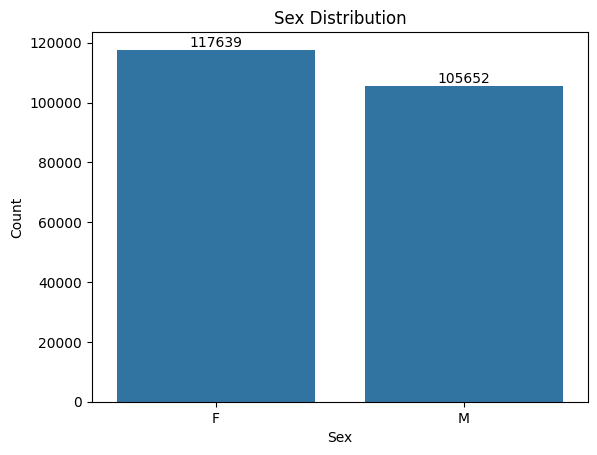

In [232]:
# Plot
ax = sns.countplot(demo, x="gender")
ax.bar_label(ax.containers[0])
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

In [119]:
# Ethnicity/race
demo["race"].value_counts()

race
WHITE                                        134170
BLACK/AFRICAN AMERICAN                        22690
UNKNOWN                                       21274
OTHER                                          7969
WHITE - OTHER EUROPEAN                         4867
ASIAN                                          4060
ASIAN - CHINESE                                3192
HISPANIC/LATINO - PUERTO RICAN                 3090
HISPANIC OR LATINO                             2576
UNABLE TO OBTAIN                               2334
HISPANIC/LATINO - DOMINICAN                    2201
BLACK/CAPE VERDEAN                             2104
WHITE - RUSSIAN                                1688
BLACK/CARIBBEAN ISLAND                         1374
BLACK/AFRICAN                                  1345
PATIENT DECLINED TO ANSWER                      941
ASIAN - SOUTH EAST ASIAN                        760
ASIAN - ASIAN INDIAN                            747
WHITE - BRAZILIAN                               668
HISPANI

In [120]:
list(demo["race"].unique())

['WHITE',
 'OTHER',
 'BLACK/AFRICAN AMERICAN',
 'UNABLE TO OBTAIN',
 'UNKNOWN',
 'WHITE - RUSSIAN',
 'BLACK/CAPE VERDEAN',
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
 'PORTUGUESE',
 'HISPANIC/LATINO - PUERTO RICAN',
 'ASIAN',
 'WHITE - OTHER EUROPEAN',
 'ASIAN - CHINESE',
 'HISPANIC/LATINO - SALVADORAN',
 'HISPANIC/LATINO - GUATEMALAN',
 'WHITE - BRAZILIAN',
 'HISPANIC OR LATINO',
 'ASIAN - KOREAN',
 'BLACK/AFRICAN',
 'BLACK/CARIBBEAN ISLAND',
 'HISPANIC/LATINO - MEXICAN',
 'PATIENT DECLINED TO ANSWER',
 'HISPANIC/LATINO - DOMINICAN',
 'AMERICAN INDIAN/ALASKA NATIVE',
 'ASIAN - SOUTH EAST ASIAN',
 'MULTIPLE RACE/ETHNICITY',
 'WHITE - EASTERN EUROPEAN',
 'HISPANIC/LATINO - HONDURAN',
 'HISPANIC/LATINO - CUBAN',
 'HISPANIC/LATINO - CENTRAL AMERICAN',
 'ASIAN - ASIAN INDIAN',
 'HISPANIC/LATINO - COLUMBIAN',
 'SOUTH AMERICAN']

In [128]:
# Group race/ethnicities
race_groups = {
    "WHITE": "WHITE/EUROPEAN",
    "WHITE - OTHER EUROPEAN": "WHITE/EUROPEAN",
    "WHITE - EASTERN EUROPEAN": "WHITE/EUROPEAN",
    "WHITE - RUSSIAN": "WHITE/EUROPEAN",
    "WHITE - BRAZILIAN": "WHITE/EUROPEAN",
    "PORTUGUESE": "WHITE/EUROPEAN",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/AFRICAN": "BLACK",
    "BLACK/CARIBBEAN ISLAND": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "HISPANIC OR LATINO": "HISPANIC/LATINO",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - CUBAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - SALVADORAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - CENTRAL AMERICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - COLUMBIAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - HONDURAN": "HISPANIC/LATINO",
    "SOUTH AMERICAN": "HISPANIC/LATINO",
    "ASIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - SOUTH EAST ASIAN": "ASIAN",
    "AMERICAN INDIAN/ALASKA NATIVE": "AMERICAN INDIAN/ALASKA NATIVE",
    "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "NATIVE HAWAIIAN/PACIFIC ISLANDER",
    "MULTIPLE RACE/ETHNICITY": "MULTIPLE",
    "OTHER": "OTHER",
    "UNABLE TO OBTAIN": "UNKNOWN",
    "PATIENT DECLINED TO ANSWER": "UNKNOWN",
    "UNKNOWN": "UNKNOWN",
}

demo["race_group"] = demo["race"].map(race_groups)
demo


,gender,race,race_group
subject_id,,,
10000032,F,WHITE,WHITE/EUROPEAN
10000068,F,WHITE,WHITE/EUROPEAN
10000084,M,WHITE,WHITE/EUROPEAN
10000108,M,WHITE,WHITE/EUROPEAN
10000117,F,WHITE,WHITE/EUROPEAN
...,...,...,...
19999733,F,WHITE,WHITE/EUROPEAN
19999784,M,BLACK/AFRICAN AMERICAN,BLACK
19999828,F,WHITE,WHITE/EUROPEAN


In [216]:
palette_dict = {
    'WHITE/EUROPEAN': '#db5f57',
    'BLACK': '#dbb757',
    'HISPANIC/LATINO': '#a7db57',
    'ASIAN': '#57db5f',
    'AMERICAN INDIAN/ALASKA NATIVE': '#57dbb7',
    'NATIVE HAWAIIAN/PACIFIC ISLANDER': '#57a7db',
    'MULTIPLE': '#5f57db',
    'OTHER': '#b757db',
    'UNKNOWN': '#db57a7',
    }

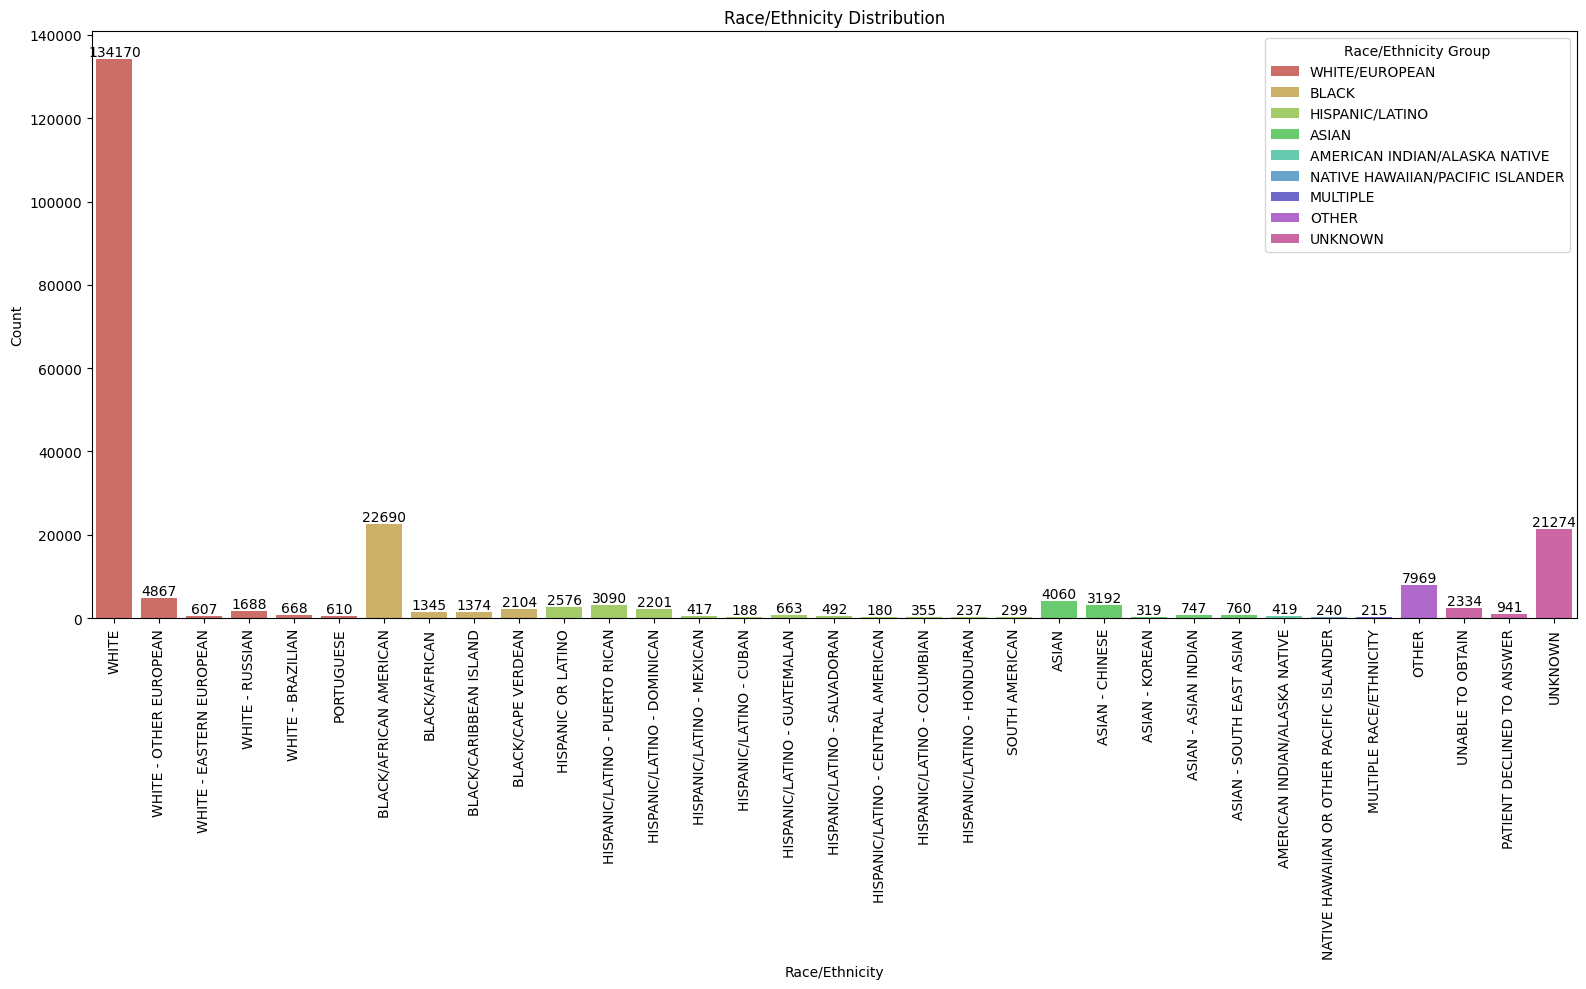

In [234]:
# Plot
plt.figure(figsize=(16, 10))

# # Order by count
# order = demo['race'].value_counts().index
# hue_order = demo['race_group'].value_counts().index.tolist()
# group_idx = range(9)

# Order by group
order = race_groups.keys()
hue_order = race_groups.values()
group_idx = (0, 6, 10, 21, 26, 27, 28, 29, 30)

ax = sns.countplot(demo, x="race", hue="race_group", order=order, hue_order=hue_order, palette=palette_dict)

# Set bar labels
for c in [ax.containers[i] for i in group_idx]:
    ax.bar_label(c)

plt.title("Race/Ethnicity Distribution")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Race/Ethnicity Group')
plt.xticks(rotation=90)
plt.tight_layout()

33


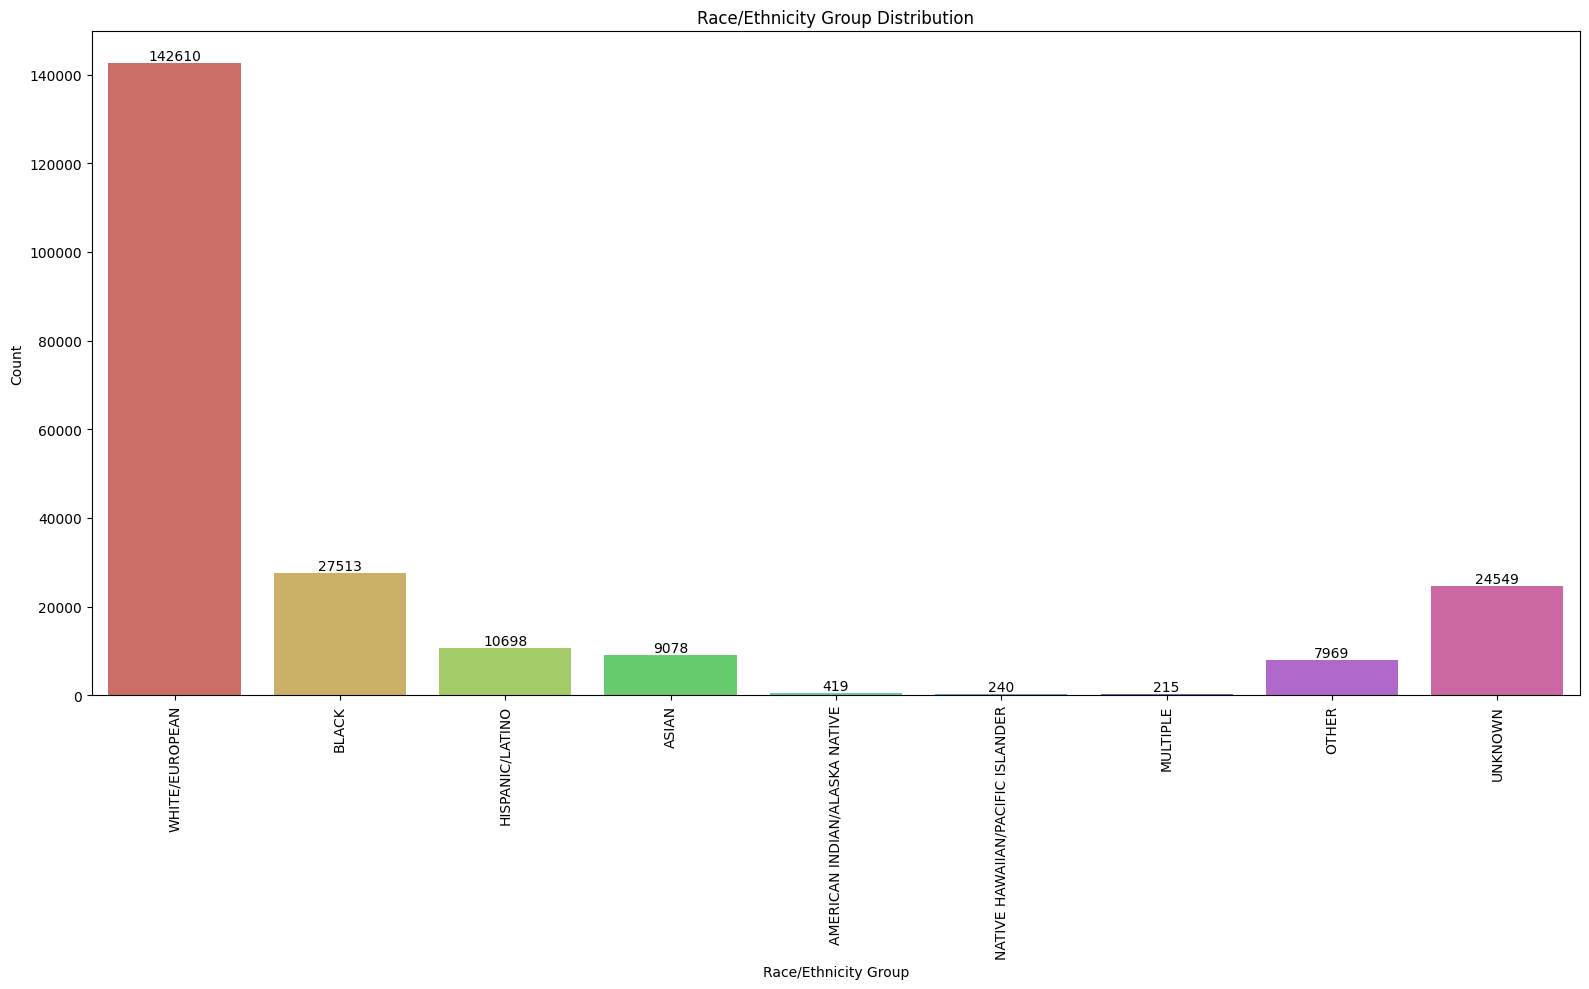

In [238]:
# Plot groups
plt.figure(figsize=(16, 10))

## Order by count
# hue_order = demo['race_group'].value_counts().index.tolist()
# group_idx = range(9)

## Order by group
hue_order = race_groups.values()
group_idx = (0, 6, 10, 21, 26, 27, 28, 29, 30)

ax = sns.countplot(demo, x="race_group", hue="race_group", order=hue_order, hue_order=hue_order, palette=palette_dict)

# Set bar labels
print(len(ax.containers))
for c in [ax.containers[i] for i in group_idx]:
    ax.bar_label(c)

plt.title("Race/Ethnicity Group Distribution")
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Aggregate data, convert to dictionary

In [223]:
# Group by subject_id
grouped = _sorted.groupby('subject_id').apply(lambda x: {
    'demographics': list(x[['anchor_year', 'anchor_year_group', 'anchor_age', 'birth_year', 'gender', 'race']].iloc[0]),
    'icd': list(zip(x['icd_code'], x['icd_version'], x['admit_age'])),
    'admission_lengths': list((x.groupby('hadm_id')['length_of_stay'].first().dt.total_seconds() / (24 * 3600))) # get length of stay in days for each admission
}).reset_index(name='person_data')


C:\Users\sys2131\AppData\Local\Temp\ipykernel_11256\1258353213.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = _sorted.groupby('subject_id').apply(lambda x: {


In [224]:
grouped.iloc[0]["person_data"]

{'demographics': [2180, '2014 - 2016', 52, 2128, 'F', 'WHITE'],
 'icd': [('5723', 9, 52),
  ('78959', 9, 52),
  ('5715', 9, 52),
  ('07070', 9, 52),
  ('496', 9, 52),
  ('29680', 9, 52),
  ('30981', 9, 52),
  ('V1582', 9, 52),
  ('07071', 9, 52),
  ('78959', 9, 52),
  ('2875', 9, 52),
  ('2761', 9, 52),
  ('496', 9, 52),
  ('5715', 9, 52),
  ('V08', 9, 52),
  ('3051', 9, 52),
  ('45829', 9, 52),
  ('07044', 9, 52),
  ('7994', 9, 52),
  ('2761', 9, 52),
  ('78959', 9, 52),
  ('2767', 9, 52),
  ('3051', 9, 52),
  ('V08', 9, 52),
  ('V4986', 9, 52),
  ('V462', 9, 52),
  ('496', 9, 52),
  ('29680', 9, 52),
  ('5715', 9, 52),
  ('07054', 9, 52),
  ('78959', 9, 52),
  ('V462', 9, 52),
  ('5715', 9, 52),
  ('2767', 9, 52),
  ('2761', 9, 52),
  ('496', 9, 52),
  ('V08', 9, 52),
  ('3051', 9, 52),
  ('78791', 9, 52)],
 'admission_lengths': [0.7861111111111111,
  1.0152777777777777,
  1.7541666666666667,
  2.2222222222222223]}

In [225]:
# Convert to dictionary
diagnoses_admissions_data = dict(grouped.set_index('subject_id')['person_data'])
diagnoses_admissions_data

{10000032: {'demographics': [2180, '2014 - 2016', 52, 2128, 'F', 'WHITE'],
  'icd': [('5723', 9, 52),
   ('78959', 9, 52),
   ('5715', 9, 52),
   ('07070', 9, 52),
   ('496', 9, 52),
   ('29680', 9, 52),
   ('30981', 9, 52),
   ('V1582', 9, 52),
   ('07071', 9, 52),
   ('78959', 9, 52),
   ('2875', 9, 52),
   ('2761', 9, 52),
   ('496', 9, 52),
   ('5715', 9, 52),
   ('V08', 9, 52),
   ('3051', 9, 52),
   ('45829', 9, 52),
   ('07044', 9, 52),
   ('7994', 9, 52),
   ('2761', 9, 52),
   ('78959', 9, 52),
   ('2767', 9, 52),
   ('3051', 9, 52),
   ('V08', 9, 52),
   ('V4986', 9, 52),
   ('V462', 9, 52),
   ('496', 9, 52),
   ('29680', 9, 52),
   ('5715', 9, 52),
   ('07054', 9, 52),
   ('78959', 9, 52),
   ('V462', 9, 52),
   ('5715', 9, 52),
   ('2767', 9, 52),
   ('2761', 9, 52),
   ('496', 9, 52),
   ('V08', 9, 52),
   ('3051', 9, 52),
   ('78791', 9, 52)],
  'admission_lengths': [0.7861111111111111,
   1.0152777777777777,
   1.7541666666666667,
   2.2222222222222223]},
 10000068: {'d

In [226]:
# Save dictionary to file
import pickle 

with open('diagnoses_admissions_data.pkl', 'wb') as f:
    pickle.dump(diagnoses_admissions_data, f)
        
# with open('diagnoses_admissions_data.pkl', 'rb') as f:
#     diagnoses_admissions_data = pickle.load(f)